
## Performance Comparison between ANN and CNN in Image Classification

#### Hassan Amer
#### Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### 1. Executive Summary

This project compares the performance of ANN and CNN architectures in image classification using the cifar10 dataset. Cifar10 dataset is well-studied and different ANN and CNN models were used for this multi-class prediction problem. However, this workflow assesses the role of neural network model complexity (in terms of the number of layers) in increasing the model’s prediction accuracy. Results compare CNN and ANN prediction accuracy vs. # of layers used. Results suggest that CNN performs better with image classification, increasing the number of layers causes overfit and reduces accuracy over testing data, and the rate of over-fitting is higher for ANN than CNN models.

### 2. Importing Packages

The following code section loads all the required libraries/packages used in this workflow.

In [1]:
import tensorflow as tf                                               # tensorflow for ANN and CNN model creation
from tensorflow.keras import layers                                   # convolution layers for CNN models
from tensorflow.keras.models import Sequential                        # Sequential approach to build neaural network models.
from tensorflow.keras.layers import Dense, Dropout, Flatten           # Dense, Dropout, and Flatter layers for ANN and CNN models
import matplotlib.pyplot as plt                                       # plotting
import numpy as np                                                    # arrays and matrix math
import ssl                                                            # allows SSL for downloading cifar10 dataset
ssl._create_default_https_context = ssl._create_unverified_context    # important to download cifar10 dataset (source:https://stackoverflow.com/questions/69687794/unable-to-manually-load-cifar10-dataset)
import gc                                                             # Garbage Collector interface

### 3. Function Declarations

The following code section defines the functions used in this workflow.

* **createModel**: This function has 3 inputs: (1) the input size of an image (shape = [32, 32, 3] for cifar10 images), (2) number of layers (hidden layers for ANN and convolution layers for CNN models), and (3) the model type if ANN or CNN. The function returns the model ready for training.

In [2]:
def createModel(input_size,numLayers,ANNorCNN):
        if ANNorCNN == 'ANN': 
            model = Sequential()
            model.add(Flatten(input_shape=input_size)) #Flatten layer 
            for i in range(numLayers): #loop to create hidden layers = numLayers
                model.add(Dense(256,activation='relu')) #FC layer of 256 newurons with 'relu' activation function
                model.add(Dropout(0.2))                 #dropout layer
            model.add(Dense(10,activation='softmax'))   #output layer of 10 neurons with 'softmax' activation function
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
            return model                                #return ANN model
        elif ANNorCNN == 'CNN':
            model = Sequential()
            for i in range(numLayers): #loop to create convolution layers = numLayers
                model.add(layers.Conv2D(32, (3, 3),strides=2, padding='same', activation='relu', input_shape=input_size)) #convolution layer with a 3*3 filter and 32 channels with 'relu activation function'
                model.add(Dropout(0.2))                 #dropout layer
            model.add(layers.Flatten())                 #Flatten layer
            model.add(layers.Dense(10, activation = 'softmax')) #output layer of 10 neurons with 'softmax' activation function
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
            return model                                #return CNN model

### 4. Enabling GPU Usage for Tensorflow.

The following code section enables the usage of the installed GPU physical device during model training with Tensorflow. If your device does not have a GPU, Tensorflow will automatically set the training using the CPU, and you will get 0 available GPUs.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')                #get available physical GPU devices.
if gpus:
  try:
    for gpu in gpus: 
        tf.config.experimental.set_memory_growth(gpu, True)               # Optimize GPU memory allocation
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')     # List available logical GPU devices (Logical devices = Physical Devices for single GPU devices in most personal PCs)
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)
    
physical_devices = tf.config.list_physical_devices('GPU')
print("Num of available GPUs:", len(physical_devices))

1 Physical GPUs, 1 Logical GPUs
Num of available GPUs: 1


### 5. Loading the CIFAR-10 Images Database

The following workflow uses the cifar10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is publically available [here](https://www.cs.toronto.edu/~kriz/cifar.html/)  

In [4]:
cifar10 = tf.keras.datasets.cifar10                             # cifar10 is the dataset object
(x_train, y_train), (x_test, y_test) = cifar10.load_data()      # download the data from the cloud
x_train, x_test = x_train / 255.0, x_test / 255.0               # normalize training and testing data (0,1)
print(type(x_train), x_train.shape)
print('The min and max values in the training data set are',np.min(x_train), 'and',np.max(x_train))

<class 'numpy.ndarray'> (50000, 32, 32, 3)
The min and max values in the training data set are 0.0 and 1.0


### 6. Input Parameters and Variables

The following code section defines the input paramters and variables used in this workflow.

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Data labels in cifar10 database
input_size = x_train.shape[1:]                        # Image input size (32,3,3)
num_layers = 5                                        # Number of layers for CNN and ANN models. You can change it from 1 - 5.
models_ANN = [] ; scores_ANN = [] ; history_ANN = []  # Empty lists for ANN models, testing evaluation scores, and training history.
models_CNN = [] ; scores_CNN = [] ; history_CNN = []  # Empty lists for CNN models, testing evaluation scores, and training history.
ANN_performance = []; CNN_performance = []            # Empty lists for ANN and CNN model performance after training on the testing data.

### 7. ANN Models

#### 7.1. ANN Model Creation and Traning.

The following code section creates ANN models with different hidden layers (# of neurons = 256, activation function = 'relu'), and traing them over the training data.

* Note that the code section below takes around 14 minutes to run for the 5 ANN models using NVIDIA GTX 1050 GPU.

In [6]:
for i in range(num_layers): # this loop (1) creates as many ANN models as indicated in the num_layers, (2) trains the models, and (3) evaluates them on testing data 
    
    # Step 1: Create an ANN model with the corresponding number of hidden layers, and append it to the models_ANN list.
    models_ANN.append(createModel(input_size,i+1,'ANN'))
    
    # Step 2: Print model's summary
    models_ANN[i].summary()
    
    # Step 3: Train the model with 50 epochs and a batch size of 64, and append the training history to history_ANN list for each model.
    history_ANN.append(models_ANN[i].fit(x_train, y_train, epochs=50, batch_size=64, validation_data = (x_test, y_test)))
    
    # Step 4: Evaluate the model using the testing data, and append the results to the scores_ANN list for each model.
    scores_ANN.append(models_ANN[i].evaluate(x_test, y_test, verbose=2))
    
    # Step 5: Clear used GPU memory and do garabage collection after each model trained per iteration. 
    tf.keras.backend.clear_session() 
    gc.collect() # Remedy for memory leak issue with tensorflow.
                 # If you did not include this line, tensorflow will raise an error that GPU memory space is not enough
                 # Source: https://githubmemory.com/repo/KordingLab/Neural_Decoding/issues/10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 9s 7ms/step - loss: 1.9795 - accuracy: 0.2845 - val_loss: 1.7862 - val_accuracy: 0.3662
Epoch 2/50
782/782 [====================

Epoch 1/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9996 - accuracy: 0.2588 - val_loss: 1.8128 - val_accuracy: 0.3522
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8656 - accuracy: 0.3163 - val_loss: 1.7624 - val_accuracy: 0.3702
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8135 - accuracy: 0.3386 - val_loss: 1.7385 - val_accuracy: 0.3867
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7857 - accuracy: 0.3540 - val_loss: 1.6878 - val_accuracy: 0.3974
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7610 - accuracy: 0.3591 - val_loss: 1.6940 - val_accuracy: 0.3932
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7533 - accuracy: 0.3653 - val_loss: 1.6662 - val_accuracy: 0.4065
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7361 - accuracy: 0.3723 - val_loss: 1.6633 - val_accuracy: 0.4163
Epoch 

Epoch 1/50
782/782 [==============================] - 4s 5ms/step - loss: 2.0094 - accuracy: 0.2441 - val_loss: 1.8668 - val_accuracy: 0.3137
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8855 - accuracy: 0.3019 - val_loss: 1.7624 - val_accuracy: 0.3634
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8511 - accuracy: 0.3181 - val_loss: 1.7786 - val_accuracy: 0.3595
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8345 - accuracy: 0.3239 - val_loss: 1.7704 - val_accuracy: 0.3672
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8299 - accuracy: 0.3267 - val_loss: 1.7479 - val_accuracy: 0.3743
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8092 - accuracy: 0.3381 - val_loss: 1.7321 - val_accuracy: 0.3659
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7895 - accuracy: 0.3452 - val_loss: 1.7400 - val_accuracy: 0.3821
Epoch 

Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 2.0165 - accuracy: 0.2436 - val_loss: 1.8522 - val_accuracy: 0.3081
Epoch 2/50
782/782 [==============================] - 4s 6ms/step - loss: 1.9104 - accuracy: 0.2919 - val_loss: 1.8354 - val_accuracy: 0.3441
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8769 - accuracy: 0.3088 - val_loss: 1.7990 - val_accuracy: 0.3393
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8532 - accuracy: 0.3201 - val_loss: 1.7812 - val_accuracy: 0.3509
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8364 - accuracy: 0.3275 - val_loss: 1.7613 - val_accuracy: 0.3655
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8200 - accuracy: 0.3389 - val_loss: 1.7370 - val_accuracy: 0.3725
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8083 - accuracy: 0.3390 - val_loss: 1.6985 - val_accuracy: 0.3979
Epoch 

Epoch 1/50
782/782 [==============================] - 5s 6ms/step - loss: 2.0547 - accuracy: 0.2184 - val_loss: 1.9017 - val_accuracy: 0.2981
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9534 - accuracy: 0.2680 - val_loss: 1.9097 - val_accuracy: 0.2980
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9103 - accuracy: 0.2954 - val_loss: 1.8341 - val_accuracy: 0.3341
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8789 - accuracy: 0.3093 - val_loss: 1.8183 - val_accuracy: 0.3512
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8662 - accuracy: 0.3166 - val_loss: 1.8042 - val_accuracy: 0.3455
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8487 - accuracy: 0.3230 - val_loss: 1.8027 - val_accuracy: 0.3462
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8355 - accuracy: 0.3268 - val_loss: 1.7833 - val_accuracy: 0.3520
Epoch 

#### 7.2. Plotting ANN Model Accuracy for Training and Testing Data.

The following code section plots the performance of ANN models with different hidden layers in terms of accuracy (%) vs. number of training epochs.

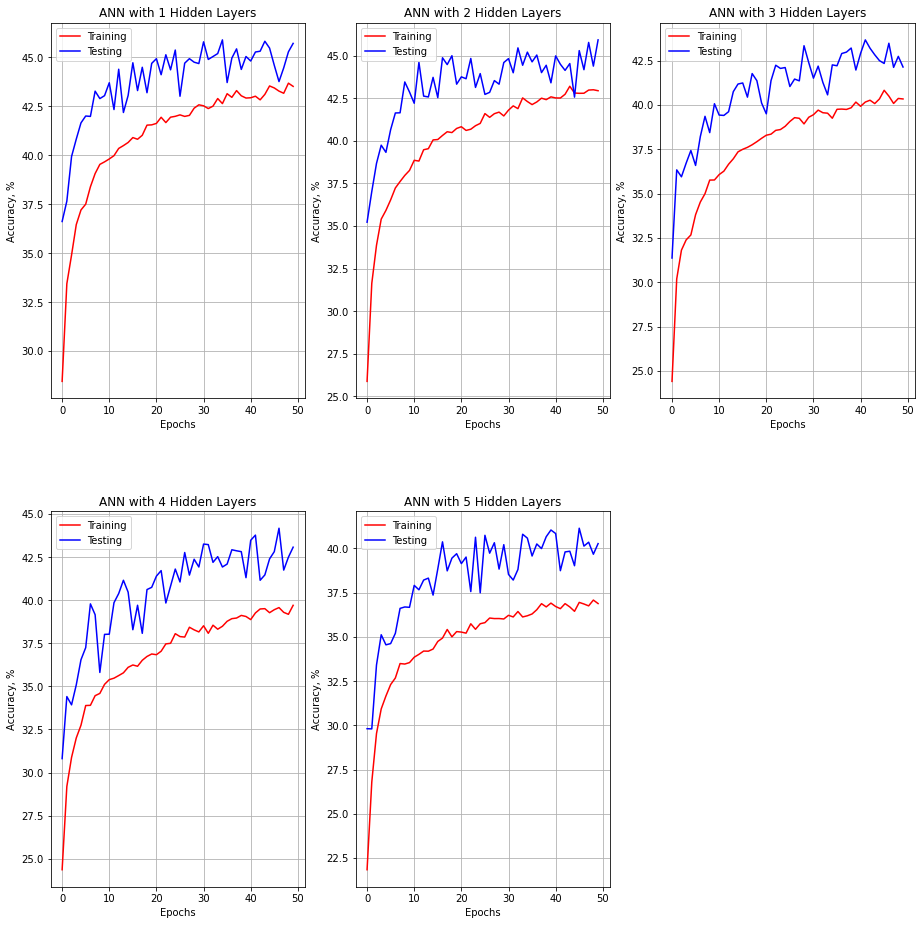

In [12]:
for i in range(len(models_ANN)):
    plt.subplot(2,3,i+1)
    plt.plot(np.array(history_ANN[i].history['accuracy']) * 100, label='Training', color='r')
    plt.plot(np.array(history_ANN[i].history['val_accuracy']) * 100, label='Testing', color='b')
    plt.xlabel(r'Epochs')
    plt.ylabel(r'Accuracy, %')
    plt.legend()
    plt.title('ANN with ' + str(i+1) +' Hidden Layer(s)')
    plt.grid(which='major', axis='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.3)

* Notice the lower accuracy percentage for testing data when ANN models are used for image classification (less than 45%). Next section introduces CNN models where the accuracy of the models can be improved.

### 8. CNN Models

#### 8.1. CNN Model Creation and Traning.

The following code section creates CNN models with different covolution layers (filter size = 3*3, # channels = 32, activation function ='relu', strides = 2, padding = same), and traing them over the training data.

* Note that the code section below takes around 25 minutes to run for the 5 CNN models using NVIDIA GTX 1050 GPU.

In [8]:
for i in range(num_layers): # this loop (1) creates as many CNN models as indicated in the num_layers, (2) trains the models, and (3) evaluates them on testing data
    
    # Step 1: Create a CNN model with the corresponding number of convolution layers, and append it to the models_CNN list.
    models_CNN.append(createModel(input_size,i+1,'CNN'))
    
    # Step 2: Print model's summary
    models_CNN[i].summary()
    
    # Step 3: Train the model with 50 epochs and a batch size of 64, and append the training history to history_CNN list for each model.
    history_CNN.append(models_CNN[i].fit(x_train, y_train, epochs=50, batch_size=64, validation_data = (x_test, y_test)))
    
    # Step 4: Evaluate the model using the testing data, and append the results to the scores_CNN list for each model.
    scores_CNN.append(models_CNN[i].evaluate(x_test, y_test, verbose=2))
    
    # Step 5: Clear used GPU memory and do garabage collection after each model trained per iteration. 
    tf.keras.backend.clear_session()
    gc.collect()           # Remedy for memory leak issue with tensorflow.
                           # If you did not include this line, tensorflow will raise an error that GPU memory space is not enough
                           # Source: https://githubmemory.com/repo/KordingLab/Neural_Decoding/issues/10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 9s 5ms/step - loss: 1.5835 - accuracy: 0.4461 - val_loss: 1.3688 - val_accuracy: 0.5154
Epoch 2/50
782/782 [======================

Epoch 1/50
782/782 [==============================] - 5s 6ms/step - loss: 1.6853 - accuracy: 0.4030 - val_loss: 1.4143 - val_accuracy: 0.4986
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.3767 - accuracy: 0.5135 - val_loss: 1.2975 - val_accuracy: 0.5482
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.2816 - accuracy: 0.5480 - val_loss: 1.2399 - val_accuracy: 0.5562
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.2192 - accuracy: 0.5685 - val_loss: 1.1638 - val_accuracy: 0.5805
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.1681 - accuracy: 0.5855 - val_loss: 1.1510 - val_accuracy: 0.5894
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.1255 - accuracy: 0.6045 - val_loss: 1.1048 - val_accuracy: 0.6030
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.0936 - accuracy: 0.6161 - val_loss: 1.0733 - val_accuracy: 0.6117
Epoch 

Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 1.7806 - accuracy: 0.3534 - val_loss: 1.4855 - val_accuracy: 0.4649
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4760 - accuracy: 0.4707 - val_loss: 1.3760 - val_accuracy: 0.5042
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.3781 - accuracy: 0.5040 - val_loss: 1.3004 - val_accuracy: 0.5367
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 1.3180 - accuracy: 0.5267 - val_loss: 1.2205 - val_accuracy: 0.5609
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2685 - accuracy: 0.5444 - val_loss: 1.1920 - val_accuracy: 0.5690
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2319 - accuracy: 0.5600 - val_loss: 1.1515 - val_accuracy: 0.5889
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.1996 - accuracy: 0.5704 - val_loss: 1.1253 - val_accuracy: 0.5978
Epoch 

Epoch 1/50
782/782 [==============================] - 7s 7ms/step - loss: 1.8331 - accuracy: 0.3237 - val_loss: 1.5143 - val_accuracy: 0.4439
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 1.5411 - accuracy: 0.4383 - val_loss: 1.3815 - val_accuracy: 0.5020
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4410 - accuracy: 0.4795 - val_loss: 1.3115 - val_accuracy: 0.5287
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 1.3818 - accuracy: 0.4994 - val_loss: 1.2627 - val_accuracy: 0.5482
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 1.3475 - accuracy: 0.5115 - val_loss: 1.2135 - val_accuracy: 0.5657
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 1.3002 - accuracy: 0.5311 - val_loss: 1.1896 - val_accuracy: 0.5784
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 1.2692 - accuracy: 0.5408 - val_loss: 1.1393 - val_accuracy: 0.5930
Epoch 

Total params: 38,218
Trainable params: 38,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 1.8989 - accuracy: 0.2957 - val_loss: 1.5831 - val_accuracy: 0.4153
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 1.6201 - accuracy: 0.4038 - val_loss: 1.4727 - val_accuracy: 0.4730
Epoch 3/50
782/782 [==============================] - 6s 7ms/step - loss: 1.5117 - accuracy: 0.4469 - val_loss: 1.3288 - val_accuracy: 0.5184
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 1.4549 - accuracy: 0.4714 - val_loss: 1.2808 - val_accuracy: 0.5387
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 1.4107 - accuracy: 0.4919 - val_loss: 1.2477 - val_accuracy: 0.5486
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 1.3804 - accuracy: 0.5044 - val_loss: 1.2385 - val_accuracy: 0.5471
Epoch 7/50
7

#### 8.2. Plotting CNN Model Accuracy for Training and Testing Data.

The following code section plots the performance of CNN models with different convolution layers in terms of accuracy (%) vs. number of training epochs.

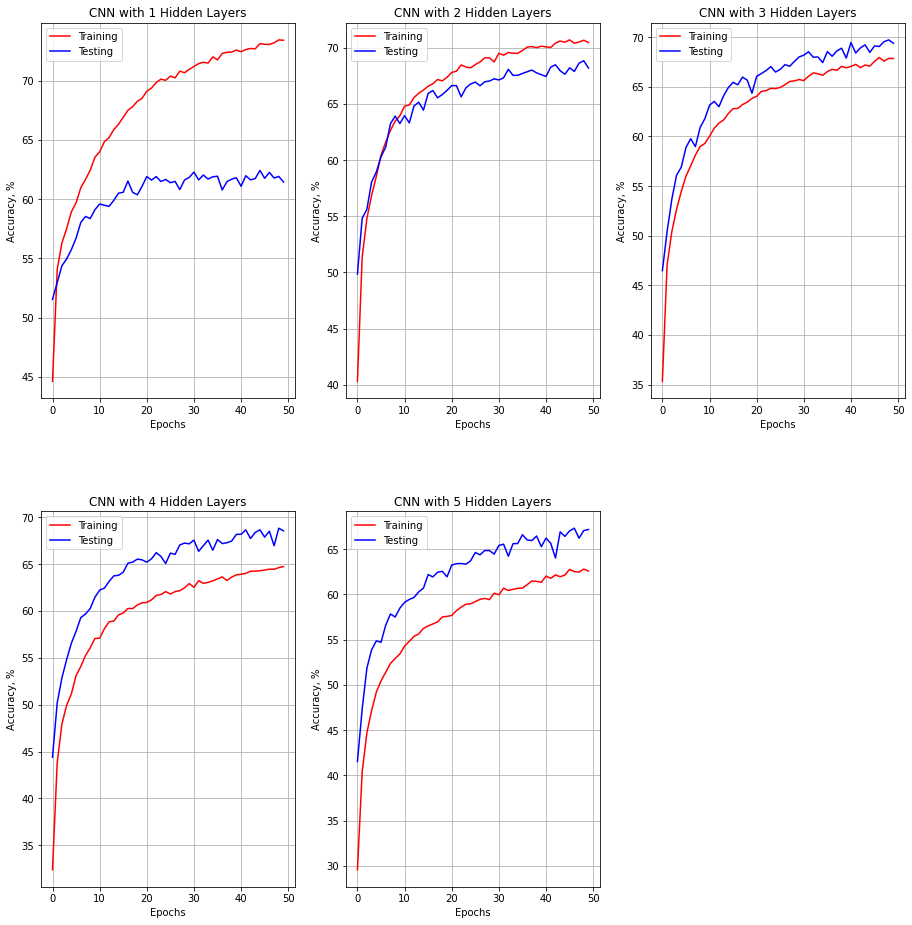

In [13]:
for i in range(len(models_CNN)):
    plt.subplot(2,3,i+1)
    plt.plot(np.array(history_CNN[i].history['accuracy']) * 100, label='Training', color='r')
    plt.plot(np.array(history_CNN[i].history['val_accuracy']) * 100, label='Testing', color='b')
    plt.xlabel(r'Epochs')
    plt.ylabel(r'Accuracy, %')
    plt.legend()
    plt.title('CNN with ' + str(i+1) +' Hidden Layer(s)')
    plt.grid(which='major', axis='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.3)

* Note that using CNN models improved the accuracy percentage over the testing data (exceeding 70%), compared to ANN models.

### 9. Performance Comparison among Different ANN and CNN Models

Now, after training the CNN and ANN models with different layers, I plot the accuracy (%) of each model vs. the number of layers in the following code section. This comparison is important for the following reasons.  

* Fine-tune the number of layers hyperparameter for each model. 
* Compare the overall performance between ANN and CNN models. 
* Compare the rate of over-fitting between ANN and CNN models.

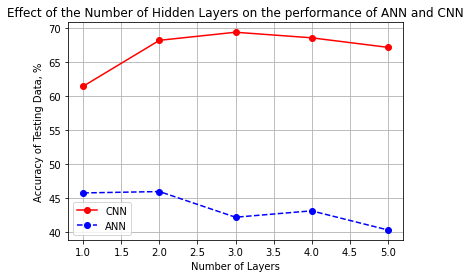

In [10]:
x0 = [i for i in range(1,num_layers+1)] # create a list from 1: number of layers (X-axis)
for i in range(num_layers):
    ANN_performance.append(scores_ANN[i][1]*100) #append accuracy (%) for each ANN model to ANN_performance list
    CNN_performance.append(scores_CNN[i][1]*100) #append accuracy (%) for each CNN model to CNN_performance list

plt.plot(x0,CNN_performance,'-ro',label='CNN')
plt.plot(x0,ANN_performance,'--bo',label='ANN')
plt.xlabel(r'Number of Layers')
plt.ylabel(r'Accuracy of Testing Data, %')
plt.legend()
plt.title('Effect of the Number of Hidden Layers on the performance of ANN and CNN models')
plt.grid(which='major', axis='both')

### 10. Comments
- CNN models (red line) outperform ANN models (blue line) in image classification as they yield higher accuracy percentages for withheld testing data. This is because CNN models have convolution layers that can extract more features from images, but ANN models have hidden layers that flattens the image input and therefore pixels lose their relevent location importance. 
- Fine-tuned number of hidden and convolution layers for ANN and CNN models are 2 and 3, respectively.  
- ANN models have a higher rate of overfitting (i.e., model's accuracy against testing data decreases as its compexity increases) compared to CNN models.


I hope this was helpful,

*Hassan Amer*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
